In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
# Imports
import os
import pandas as pd
from dw_events.temperature_compensation.savgol_filter import SavgolTempComp
from dw_events.data.make_dataset import DataGetter
from dw_events.data.utils import make_dt_list, get_dataframe_str_subset
import datetime
import matplotlib.pyplot as plt

In [69]:
start = datetime.datetime(2022, 9, 1)
end = datetime.datetime(2022, 9, 2)
datagetter = DataGetter(start, end)
strain_data = datagetter.get_strain_data()

In [67]:
# Get strain line data BCN
BCN_signals = datagetter.get_dataframe_str_subset('BCN')

In [111]:
window = 600
polyorder = 1
savgol_filter = SavgolTempComp(BCN_signals, window, polyorder)

In [112]:
filtered_data = savgol_filter.apply_filter()

In [113]:
filtered_data = filtered_data.reindex(BCN_signals.index).interpolate()

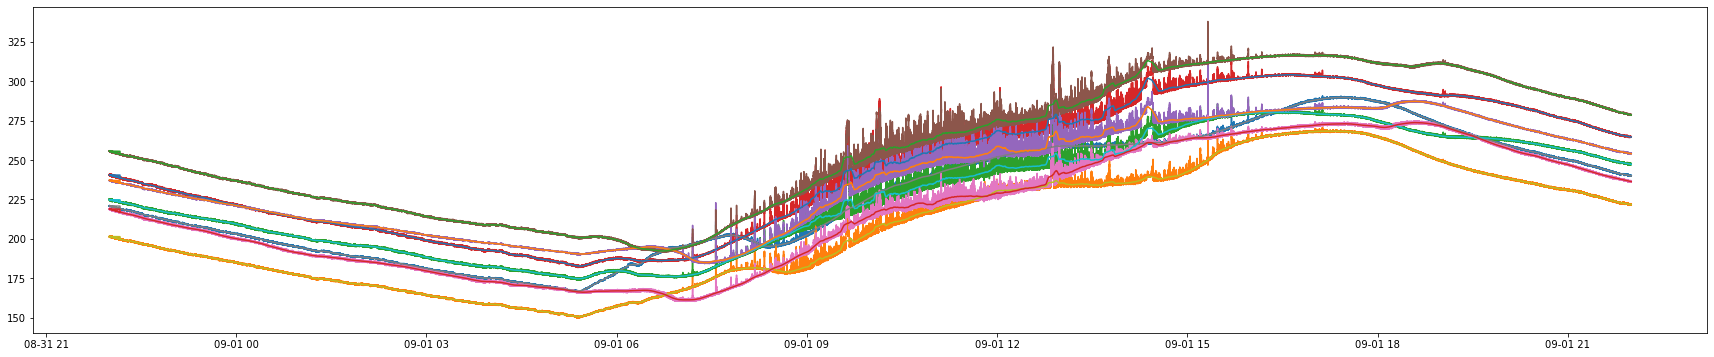

In [114]:
plt.figure(figsize=(30,6))
plt.plot(BCN_signals)
plt.plot(filtered_data)

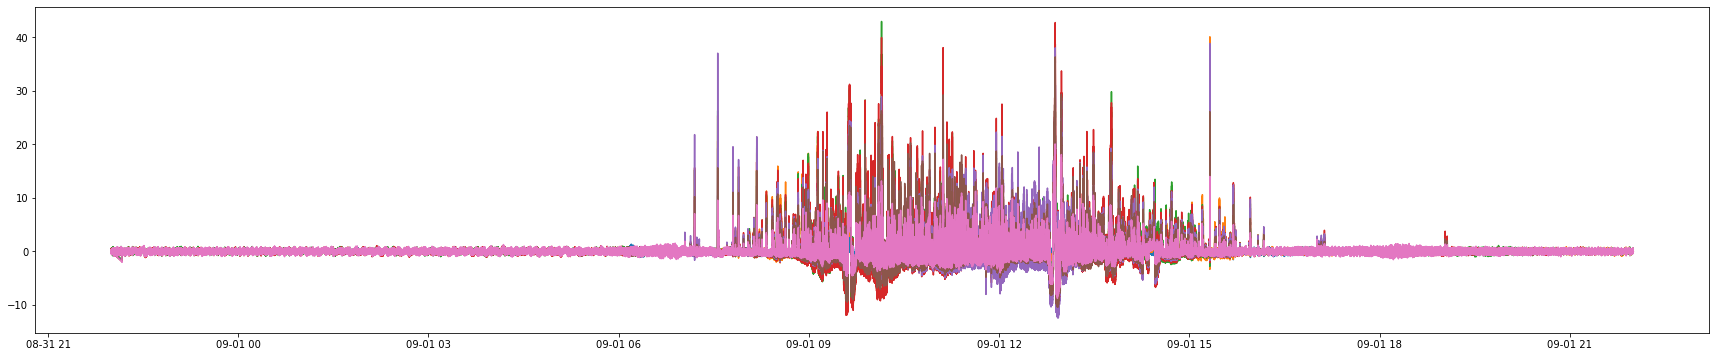

In [115]:
plt.figure(figsize=(30,6))
plt.plot(BCN_signals - filtered_data)